In [1]:
using MKL
using PhysicalUnits, LinearAlgebra
using MoireIVC.LLHF
using MoireIVC.LLHF_Plot
using MoireIVC.LLTDHF
using CairoMakie
CairoMakie.activate!()
Threads.nthreads()

12

#### 1. Abrikosov vortex lattice

In [2]:
AVL_sys = LLHF.LLHFSysPara(
    ϵ = 5, 
    a_Moire = 0.352nm/2.0/sind(2.1/2.0) * sqrt(1.5), 
    D = 20nm,
    ratio12 = sqrt(3.0),
    cosθ = 0.0,
    sinθ = 1.0,
);
W0 = AVL_sys.W0; @show W0/meV;
A_uc = AVL_sys.Area_uc; @show A_uc/nm^2;
@show AVL_sys.l/nm;

W0 / meV = 80.76797569424355
A_uc / nm ^ 2 = 79.88610603979627
AVL_sys.l / nm = 3.5657073156103114


In [12]:
N1 = 40; N2 = 70;
@time AVL_para = LLHF_init_with_lambda(0.0, AVL_sys; 
    N1 = N1, N2 = N2, LL = 0
);

 35.963694 seconds (222.30 k allocations: 18.929 GiB, 4.47% gc time)


In [13]:
LLHF.H0_P!(AVL_para, 0.0);

In [16]:
ρ_AVL = LLHF_solve(AVL_para; error_tolerance = 1E-10,
    post_procession = [LLHF.Trans(1,1); LLHF.PT(0,:PT)],
    stepwise_output = false, final_output = true
);
LLHF_EnergyPerArea(ρ_AVL; para = AVL_para) / (W0/A_uc)

converged in 19 iterations, density error = 9.558424298802317e-11


-0.1805781462607271

#### 2. moire triangular period

In [17]:
N1 = 60; N2 = 60;
@time C3_para = LLHF_init_with_lambda(0.0; 
    N1 = N1, N2 = N2, LL = 0
);
W0 = C3_para.system.W0; @show W0/meV;
A_uc = C3_para.system.Area_uc; @show A_uc/nm^2;

 60.341214 seconds (737.81 k allocations: 31.307 GiB, 6.83% gc time, 0.07% compilation time)
W0 / meV = 80.76797569424355
A_uc / nm ^ 2 = 79.88610603979627


In [18]:
LLHF.H0_P!(C3_para, 0.0);

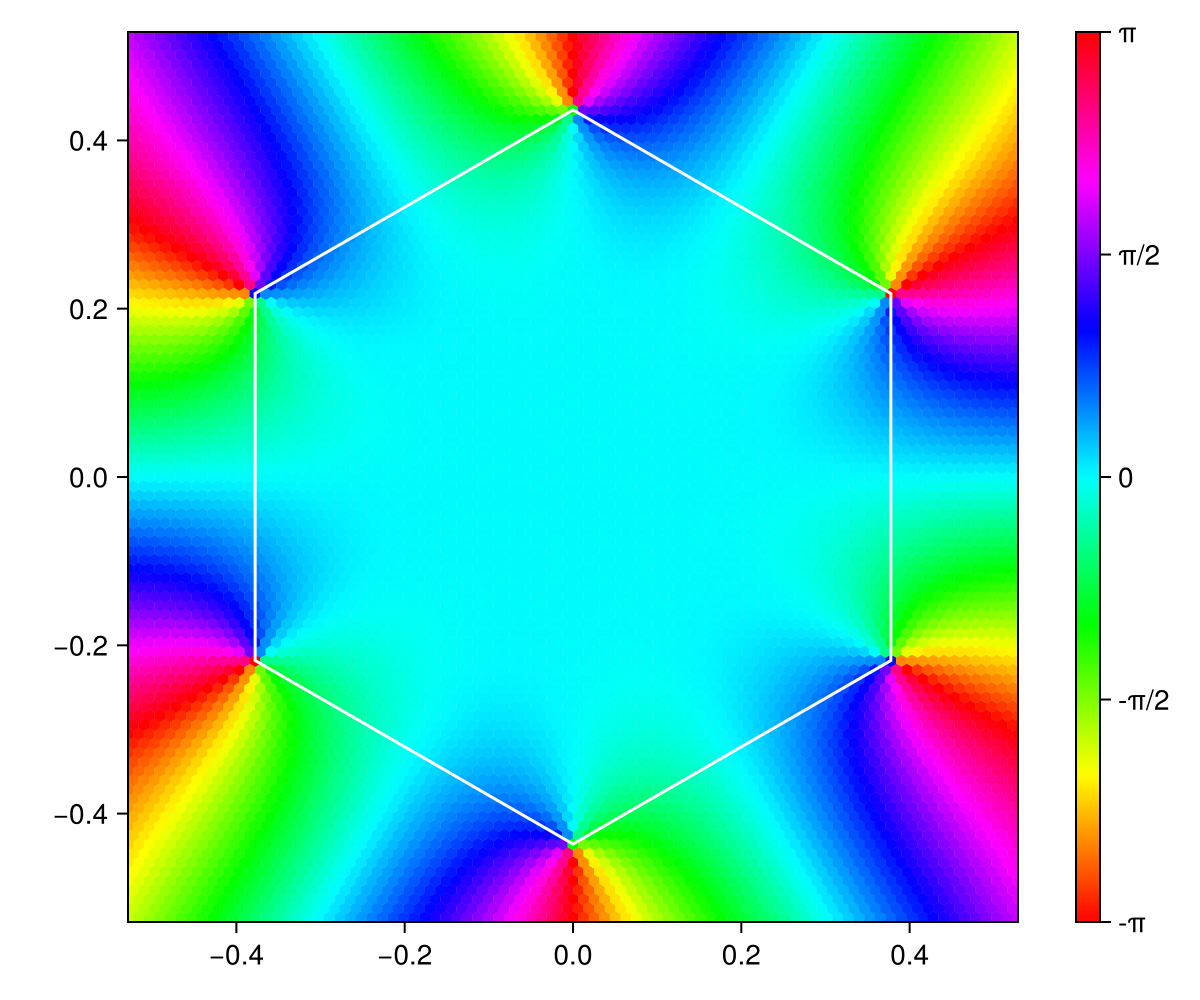

converged in 12 iterations, density error = 1.4177111020379015e-11


-0.17582509280448594

In [19]:
ρ_v0 = LLHF_solve(C3_para; error_tolerance = 1E-10,
    post_procession = [LLHF.Rot3(0); LLHF.PT(0,:P)],
    stepwise_output = false, final_output = true
);
LLHF_plot_phase(ρ_v0; para=C3_para)
LLHF_EnergyPerArea(ρ_v0; para = C3_para) / (W0/A_uc)

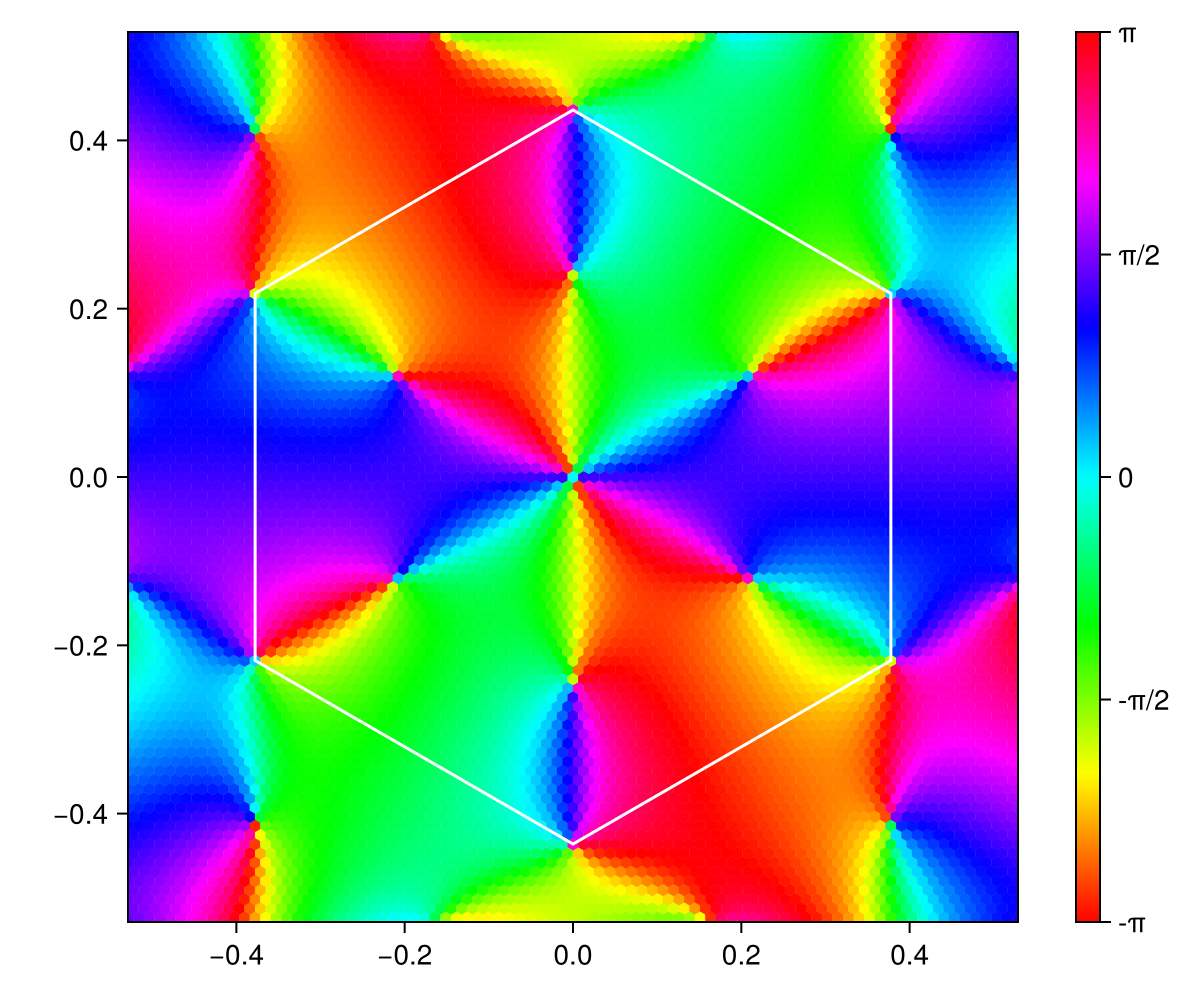

not converged after 40 iterations, density error = 0.0007243188313968787.


-0.04005937181787784

In [20]:
ρ_v1 = LLHF_solve(C3_para; error_tolerance = 1E-10,
    post_procession = [LLHF.Rot3(1); LLHF.PT(0,:P)],
    stepwise_output = false, final_output = true,
    max_iter_times = 40,
);
LLHF_plot_phase(ρ_v1; para=C3_para)
LLHF_EnergyPerArea(ρ_v1; para = C3_para) / (W0/A_uc)

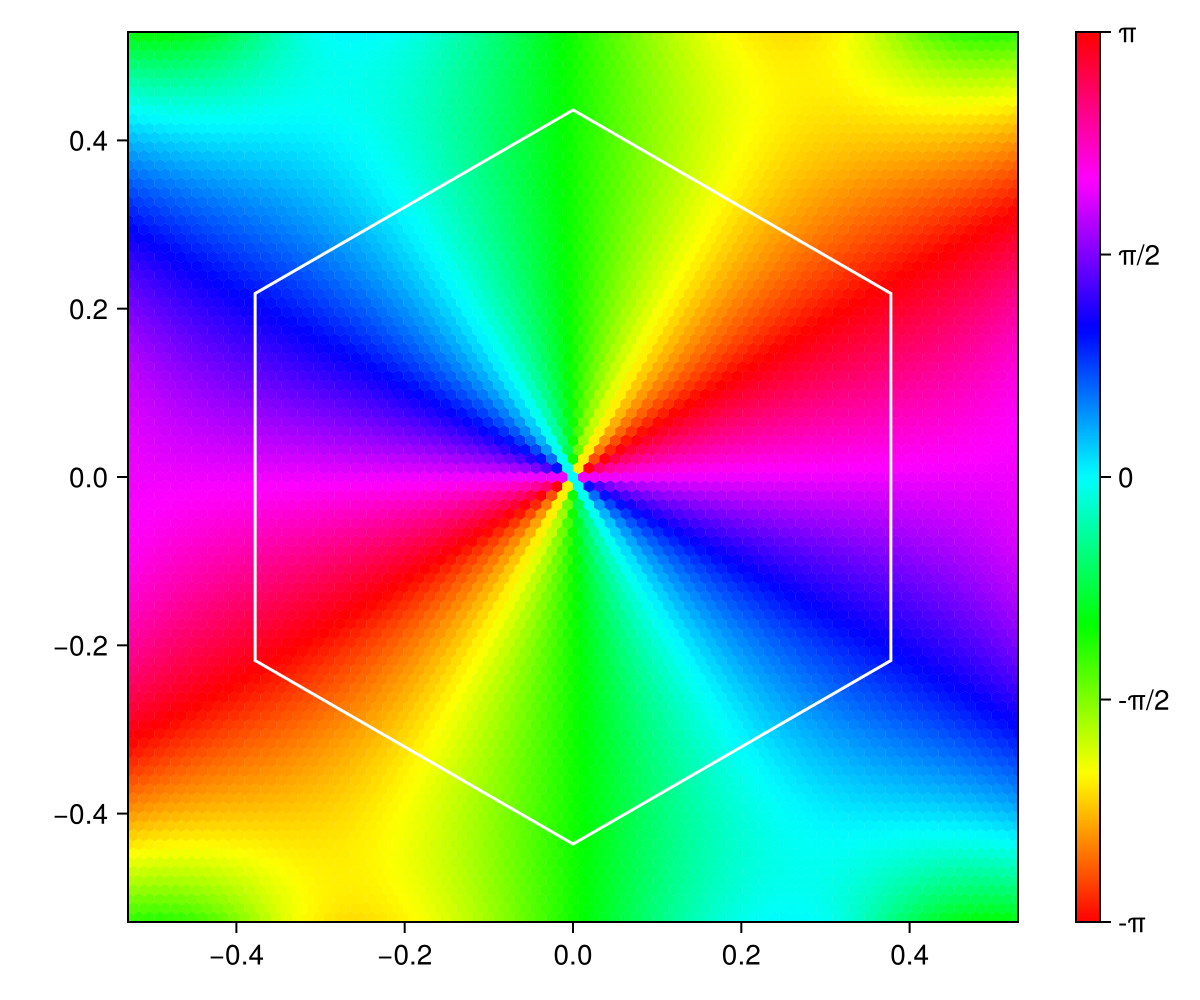

converged in 11 iterations, density error = 9.125856790796559e-12


-0.16791852267536872

In [21]:
ρ_v2 = LLHF_solve(C3_para; error_tolerance = 1E-10,
    post_procession = [LLHF.Rot3(2); LLHF.PT(0,:P)],
    stepwise_output = false, final_output = true,
);
LLHF_plot_phase(ρ_v2; para=C3_para)
LLHF_EnergyPerArea(ρ_v2; para = C3_para) / (W0/A_uc)

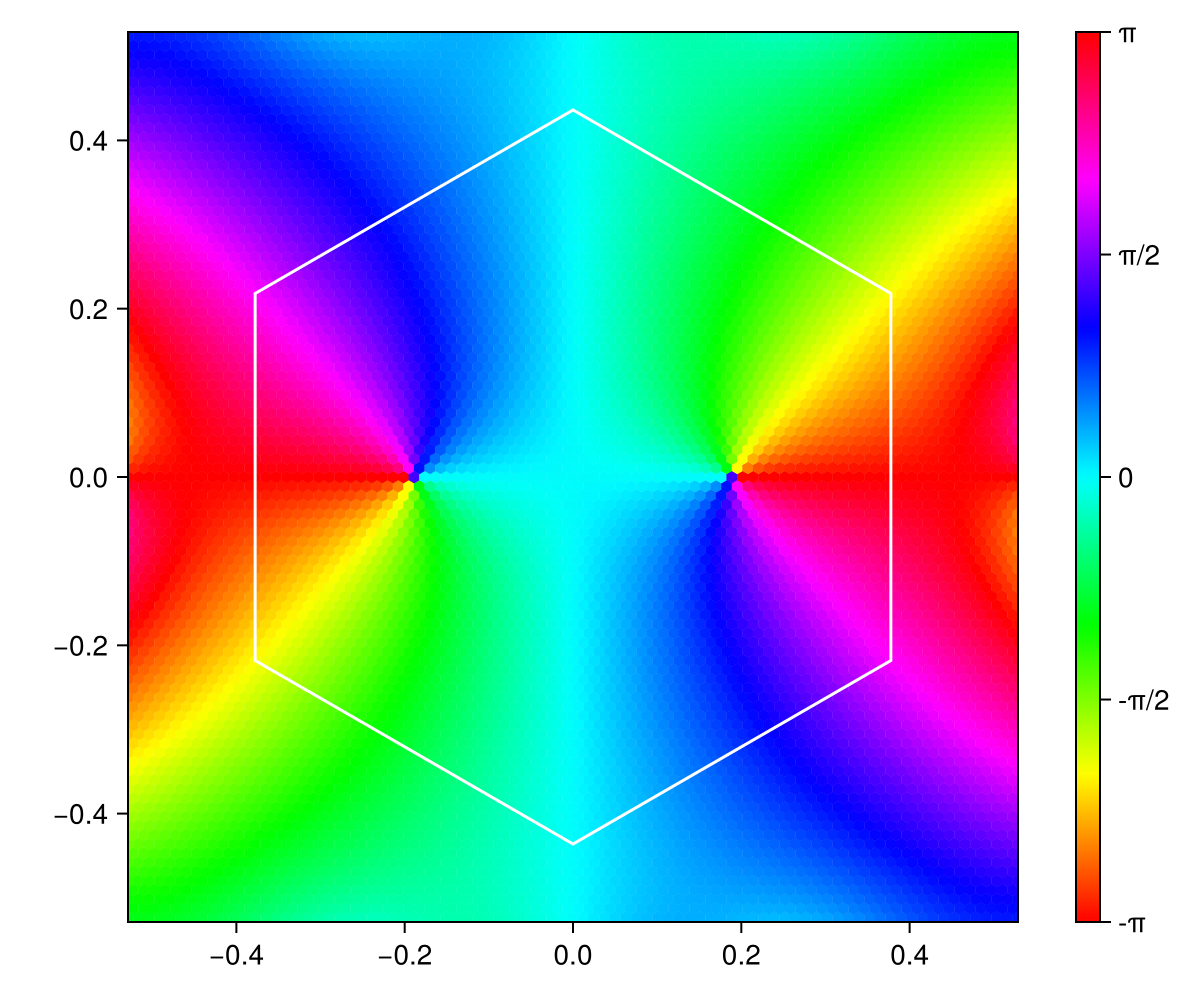

converged in 24 iterations, density error = 8.222628924058793e-11


-0.1745029747376005

In [22]:
ρ_rect = LLHF_solve(C3_para; error_tolerance = 1E-10,
    post_procession = [LLHF.Trans(1,0); LLHF.PT(0,:P)],
    stepwise_output = false, final_output = true
);
LLHF_plot_phase(ρ_rect; para=C3_para)
LLHF_EnergyPerArea(ρ_rect; para = C3_para) / (W0/A_uc)